## Biological Neurons

#### Dendrites are extension of a nerve cell that received impulses from other neurons
#### Cell nucleus stores cell's hereditary material and coordinates cell's activities
#### Axon is a nerve fiber that is used by neurons to transmit impulses
#### Synapse is the connection between the two nerve cells


#### Artificial Neuron 
#### Each input is multiplied by a weight and then a non-linear function is applied and then the summed up value is sent out as output
#### Perceptron - Single layer neural network - Each input is multiplied by a weight and then add them up, then apply a non-linear function, you get the output.  There is no hidden layer.  There is an input layer and then finally you have an output layer. 
#### Summation Function: W1*X1 + W2*X2 + W3*X3
#### Activation Function: Non-linear function is applied
#### Output is then sent out

### Forward propagation: 
#### Neural network learns the weights, weights are initialized by zero

#### Let's say if we have two inputs X1 and X2 with weights W1 and W2 and a bias term.  
#### Z = w1x1 + w2x2 + b
#### y^ = sigmoid(z)
#### Binary Crossentropy Loss or Log Loss Function, L = -y*log (y^) - (1 -y)*log(1-y^); y is actual value, y^ is predicted value
#### Cost Function c = 1/m *Ei(L) where i between 1 and m; Cost is average of Loss. 
#### Log Loss is calculated at the record level and Cost Function is at the data set level.  Log Loss is averaged at the data set level which is the cost function.  

#### The objective to any machine learning or deep learning is to minimize the loss.  This means that actual value and predicted value are nearly same.

#### How do I change my weigths so that loss becomes minimum? There comes backward propagation. 
### Backward Propagation: Gradient Descent
#### i. Initialize parameter by some value
#### ii. For each iteration, calculate the derivative of the loss function and simultaneously update the parameters (w = w - alpha * (dJ/dW) where alpha is learning rate; b = b - alpha*(dJ/db) 
#### 

### epoch: One cycle of forward propagation and backward propagation

#### After several iterations of epoch, we get the optimal value of weight such that the loss is minimum. 


### By Gradient Descent 
#### W1 = W1 - LearningRate * (deltaL/deltaW1)
#### W2 = W2 - LearningRate * (deltaL/deltaW2)
#### W3 = W2 - LearningRate * (deltaL/deltaW3)

#### by chain rule of derivatives
#### deltaL/deltaW1 = (deltaL/deltaa)* (deltaa




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(12345)

In [3]:
df = pd.read_csv('cancer-data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.shape[1]

33

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# Remove the 'id' column (column 1st) and the last column 'Unnamed'. 
df = df.iloc[:, 1:df.shape[1]-1]

# df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.shape

(569, 31)

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
df['diagnosis']= df['diagnosis'].map({'M': 1, 'B':0})

In [16]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [22]:
X= df.drop(['diagnosis'], axis=1) # Contains features
y= df['diagnosis'] # Contains label

In [23]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify = y, 
                                                    train_size = 0.8, 
                                                    random_state = 12345)

In [28]:
print(f"Train shape {X_train.shape} {y_train.shape}")

Train shape (455, 30) (455,)


In [29]:
print(f"Test shape {X_test.shape} {y_test.shape}")

Test shape (114, 30) (114,)


In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
### (x-mu)/sigma
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [33]:
# We transpose the X matrix so that each column represents a sample and rows are the features. 
# A -> shape (m,n) , B -> shape(n,p) then A*B is not possible.  
# Number of rows & columns in matrix A has to be same as in Matrix B in order to multiple A*B
# If A shape is (m,n) and B shape is (m,p) then A*B is possible but B*A is not possible

In [34]:
X_train_n = X_train_sc.T
X_test_n = X_test_sc.T
y_train_n = y_train.values.reshape(1, -1)
y_test_n = y_test.values.reshape(1, -1)

In [35]:
type(y_train)

pandas.core.series.Series

In [36]:
print(f"Train shape {X_train_n.shape} {y_train_n.shape}")

train shape (30, 455) (1, 455)


In [37]:
print(f"Test shape {X_test_n.shape} {y_test_n.shape}")

Test shape (30, 114) (1, 114)


In [38]:
import scipy as sc

In [43]:
sc.special.expit(0)

0.5

In [44]:
# sigmoid = 1/(1+ exp(-z)) 
# If z is 0 then 1/(1+exp(0)) = 1/2 = 0.5

In [45]:
# Initialize the weights to 0
w = np.zeros((X_train_n.shape[0],1))

In [46]:
w.shape

(30, 1)

In [47]:
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
b=0 # Initialize bias weight to 0

In [49]:
b

0

In [52]:
## Defining constant values (alpha is the learning rate and iterations for Gradient Descents)
alpha = 0.01 ## Learning Rate

In [53]:
num_iters = 200 # Also known as Epochs

In [54]:
costs = []
m = X_train_n.shape[1]

In [55]:
m

455

In [56]:
for i in range(num_iters):
    print(f"Iteration {i}")
    ## Calculate prediction based on the weights
    ## Sigmoid(w.T*X+b)
    A = sc.special.expit(np.dot(w.T, X_train_n)+b) ## Forward Propagation

    # Compute cost
    cost = np.sum(((-np.log(A))*y_train_n + (-np.log(1-A))*(1-y_train_n)))/m
    
    ## Backward Propagation
    dw = (np.dot(X_train_n,(A-y_train_n).T))/m ## dJ/dw
    db = (np.sum(A-y_train_n))/m ## dJ/db
    
    ## Gradient Descent
    w = w - alpha*dw # w = w - learning rate*dJ/dw
    b = b - alpha*db # b = b - learning rate * dJ/db          
    
    # Append cost for plotting
    costs.append(cost)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [57]:
w

array([[ 0.21359584],
       [ 0.14465353],
       [ 0.21440394],
       [ 0.20878335],
       [ 0.08440508],
       [ 0.11786193],
       [ 0.16658458],
       [ 0.21363462],
       [ 0.07761804],
       [-0.05890534],
       [ 0.16620667],
       [-0.00330666],
       [ 0.15561763],
       [ 0.16643805],
       [-0.03567052],
       [ 0.00442397],
       [-0.01177832],
       [ 0.06132576],
       [-0.02931021],
       [-0.05960157],
       [ 0.23890871],
       [ 0.17877481],
       [ 0.23599514],
       [ 0.2252047 ],
       [ 0.14147514],
       [ 0.14395888],
       [ 0.16847597],
       [ 0.22714186],
       [ 0.13529896],
       [ 0.0714789 ]])

In [58]:
b

-0.15254316568314696

In [59]:
nn_tr_predict = sc.special.expit(np.dot(w.T, X_train_n)+b) > 0.5 # Training set prediction
nn_ts_predict = sc.special.expit(np.dot(w.T, X_test_n)+b) > 0.5 # Test data set prediction

In [60]:
nn_ts_predict

array([[ True, False, False,  True, False, False, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False,  True,  True,  True,
        False, False,  True, False, False,  True, False, False,  True,
        False, False,  True,  True, False,  True, False, False,  True,
        False, False, False,  True,  True,  True, False,  True, False,
        False, False,  True,  True, False,  True, False,  True, False,
        False,  True,  True, False,  True, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
         True, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False]])

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
# Accuracy on training and test set
acc_tr = accuracy_score(y_pred = nn_tr_predict[0], y_true = y_train_n[0])
acc_ts = accuracy_score(y_pred = nn_ts_predict[0], y_true = y_test_n[0]) 

In [66]:
print(f"Train Acc {acc_tr} {acc_ts}")

Train Acc 0.9604395604395605 0.9912280701754386


In [68]:
# Test set confusion matrix
print("# Test Set #")
print(confusion_matrix(y_pred = nn_ts_predict[0], y_true = y_test_n[0]))

# Test Set #
[[72  0]
 [ 1 41]]


In [69]:
# Training set confusion matrix
print('# Training Set')
print(confusion_matrix(y_pred = nn_tr_predict[0], y_true = y_train_n[0]))

# Training Set
[[277   8]
 [ 10 160]]


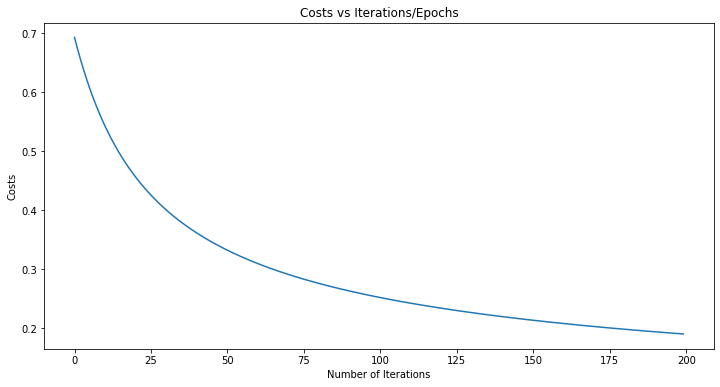

In [67]:
# Plot how the cost keeps reducing

import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Costs")
plt.title("Costs vs Iterations/Epochs")
plt.show()

## Activation Functions

#### 1. Sigmoid Function 
#### 2. Tanh
#### 3. ReLu

#### These activation functions are defined in each neuron. 
#### You can NOT have different activation function in all neurons. All neurons have the same activation function.  If you are using ReLu for one neuron then you will use this for all neurons. 

## Regularization

#### Deep Neural Networks: When a neural network contains more than one hidden layer, it becomes 

### The Overfitting Problem (Training accuracy is high, test accuracy is lower than training accuracy)
#### 1. Early Stoppping Alogrithm
#### 2. L1/L2 Regularization, L1 is Lasso, L2 is Ridge, L1L2 is Elastic Net
#### 3. Dropout Regularization - Drop certain nodes randomly, it is very popular.  By dropping certain neurons (nodes), it simplifies the neural network to manage overfitting.  

#### 

### The Underfitting problem 
#### 1. Increase/Decrease  the number of hidden layer
#### 2. Increase/Decrease the number of neurons
#### 3. Change the value of learning rate